Aula 7: Mais exploração de dados com pandas e seaborn
=====================================================

### Revisão

![](https://docs.oracle.com/cd/B28359_01/appdev.111/b28370/img/lnpls008.gif)

### Projeto

1. Pense em um jogo ou problema do dia-a-dia
2. Divida o programa em tarefas
3. Ordene a sequência de tarefas em ordem lógica
4. Classifique cada passo em
   1. Entrada
   2. Processamento
   3. Saída
   4. Armazenamento
5. Defina o algoritmo do programa e faça um diagrama de fluxo
6. Comece a programar

## Análise exploratória

In [2]:
import requests
url = (
    'https://databank.worldbank.org/data/download/WDI_excel.zip'
)
r = requests.get(url)

In [3]:
import zipfile
from io import BytesIO

zip = zipfile.ZipFile(BytesIO(r.content))
zip.extractall("./")
zip.close()

In [4]:
import pandas
df = pandas.read_excel("WDIEXCEL.xlsx", sheet_name="Data")

In [5]:
df.shape

(378840, 65)

In [6]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.702495,74.944860,76.258066,77.120464,78.094440,79.062000,79.851681,80.570536,81.210886,81.809630,82.368101,82.783289,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN
1,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.297851,78.302779,78.980861,78.479364,80.023047,77.999111,79.306311,79.537184,80.574728,84.621206,82.926878,83.644992,84.270921,86.959991,87.199474,87.512260,88.129881,87.275323,88.720097,89.308602,90.283638,89.286856,NaN,NaN
2,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.173305,56.103435,57.350189,57.353298,59.528339,60.383730,62.112010,63.261702,61.626342,64.908930,66.246450,64.850152,64.471295,66.612006,72.367301,68.805997,72.135831,70.506461,75.816160,75.958878,77.251714,78.165706,75.512153,78.211000,79.065508,81.102134,79.248100,NaN,NaN
3,Arab World,ARB,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.574429,93.022834,93.321986,93.601289,93.556321,95.141707,94.939743,95.712972,95.065438,96.290866,96.466418,96.435957,96.772853,96.466705,96.936319,97.290083,97.467915,97.063959,NaN,NaN
4,Arab World,ARB,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.260538,NaN,NaN,30.277130,NaN,NaN,37.165211,NaN,NaN,NaN


In [7]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [8]:
df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,3.726000e+04,4.213000e+04,4.435600e+04,4.420900e+04,4.475400e+04,4.694300e+04,4.702700e+04,4.872600e+04,4.830100e+04,5.013600e+04,6.817200e+04,7.511400e+04,7.816900e+04,7.769600e+04,7.914900e+04,8.283700e+04,8.513900e+04,8.900800e+04,8.863000e+04,8.947100e+04,9.412500e+04,9.636000e+04,9.799100e+04,9.758600e+04,9.835800e+04,9.968500e+04,1.005340e+05,1.020470e+05,1.005720e+05,1.024190e+05,1.263050e+05,1.336000e+05,1.385210e+05,1.393420e+05,1.415350e+05,1.490890e+05,1.488040e+05,1.508340e+05,1.521870e+05,1.577300e+05,1.814910e+05,1.737500e+05,1.789920e+05,1.789780e+05,1.842270e+05,1.969140e+05,1.955330e+05,2.003800e+05,1.983570e+05,1.983620e+05,2.141650e+05,2.044440e+05,2.087520e+05,2.024700e+05,2.095180e+05,2.061300e+05,2.054130e+05,1.967820e+05,1.855780e+05,1.429110e+05,5.724000e+03
mean,2.395272e+11,2.284995e+11,2.297228e+11,2.369814e+11,2.525977e+11,2.708733e+11,2.899641e+11,3.045435e+11,3.530124e+11,3.787043e+11,3.406745e+11,3.440595e+11,3.761362e+11,4.276908e+11,5.135724e+11,5.241495e+11,5.876082e+11,5.736581e+11,5.787932e+11,5.642182e+11,4.943310e+11,4.875312e+11,5.199796e+11,6.970070e+11,7.666863e+11,8.783785e+11,8.547353e+11,8.107671e+11,6.270942e+11,6.927283e+11,7.262649e+11,7.026981e+11,7.214072e+11,7.946315e+11,8.963551e+11,9.261259e+11,8.906611e+11,9.040039e+11,8.167131e+11,7.994885e+11,7.299593e+11,7.976982e+11,9.662591e+11,9.376809e+11,1.077435e+12,1.093197e+12,1.245679e+12,1.487385e+12,1.692461e+12,1.774290e+12,1.955998e+12,2.299751e+12,2.436458e+12,2.802150e+12,2.960778e+12,3.136749e+12,3.429913e+12,3.740878e+12,4.412209e+12,6.234534e+12,6.245151e+06
std,1.000718e+13,1.030644e+13,1.071184e+13,1.123093e+13,1.209061e+13,1.341991e+13,1.474732e+13,1.608462e+13,1.854376e+13,2.090996e+13,1.996843e+13,2.161943e+13,2.431356e+13,2.685842e+13,3.043560e+13,3.045859e+13,3.545480e+13,3.403244e+13,3.201853e+13,2.963593e+13,2.432142e+13,2.343111e+13,2.615516e+13,4.032099e+13,5.095527e+13,6.805164e+13,6.505449e+13,5.484553e+13,2.874245e+13,3.160349e+13,4.082747e+13,3.519622e+13,3.698751e+13,4.332874e+13,5.203030e+13,5.425946e+13,4.013751e+13,3.839615e+13,3.426958e+13,3.674494e+13,4.007179e+13,4.678648e+13,3.841161e+13,5.261294e+13,4.545561e+13,4.974419e+13,5.253134e+13,5.668740e+13,6.271198e+13,6.682905e+13,7.724661e+13,8.881321e+13,9.546451e+13,1.106401e+14,1.209965e+14,1.277865e+14,1.418184e+14,1.554917e+14,1.837858e+14,2.446014e+14,9.634484e+07
min,-3.344191e+14,-3.823000e+14,-4.327955e+14,-4.769875e+14,-5.339358e+14,-6.264716e+14,-7.120024e+14,-8.245134e+14,-9.379467e+14,-1.122499e+15,-1.272391e+15,-1.410486e+15,-1.612600e+15,-1.442428e+15,-3.996070e+14,-3.860707e+14,-4.109185e+14,-3.989454e+14,-3.438116e+14,-8.260263e+13,-7.647995e+12,-5.730628e+12,-1.043522e+14,-2.407210e+14,-1.998583e+14,-2.067125e+14,-3.042747e+14,-9.780146e+13,-5.719511e+14,-5.718325e+14,-6.387263e+14,-7.806362e+14,-8.179309e+14,-4.409756e+14,-4.202818e+14,-5.457861e+14,-5.679784e+14,-6.571318e+14,-3.291633e+15,-4.958967e+15,-7.109153e+15,-8.938409e+15,-2.794935e+15,-9.824821e+15,-5.361126e+15,-7.157321e+15,-6.200057e+15,-1.691820e+14,-4.636015e+14,-2.286880e+14,-1.827709e+14,-2.168927e+14,-3.013845e+14,-3.495617e+14,-5.189385e+14,-8.530882e+14,-1.374106e+15,-1.345846e+15,-1.297804e+15,-1.376877e+15,0.000000e+00
25%,4.611832e+00,4.544974e+00,4.472185e+00,4.706685e+00,4.761929e+00,4.601524e+00,4.829136e+00,4.720533e+00,4.975370e+00,4.469595e+00,4.807502e+00,4.843332e+00,4.920350e+00,5.068860e+00,5.100000e+00,4.888346e+00,5.100569e+00,5.028277e+00,5.174886e+00,5.235856e+00,5.491193e+00,5.240222e+00,5.077889e+00,5.325182e+00,5.469099e+00,5.444416e+00,5.444922e+00,5.373896e+00,5.648854e+00,5.727822e+00,5.467372e+00,5.787158e+00,5.819568e+00,5.950000e+

In [9]:
countries = ["BRA", "RUS", "IND", "CHN", "ZAF"]
sel = df["Country Code"].isin(countries)
brics = df[sel]

In [10]:
indicators = [
    "EG.ELC.ACCS.ZS",
    "NY.ADJ.NNTY.PC.CD",
    "AG.LND.AGRI.ZS",
    "SP.DYN.CBRT.IN",
    "SE.XPD.TOTL.GD.ZS"
]
sel = (
    df["Country Code"].isin(countries) & 
    df["Indicator Code"].isin(indicators)
)
brics = df[sel]
brics.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
126791,China,CHN,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.388740,1.604760,1.650820,1.761150,1.708500,1.816570,1.749540,1.958840,2.148050,1.911900,1.948810,2.034480,2.076920,1.998630,2.008140,2.061550,1.804250,1.764180,NaN,NaN,NaN,1.654560,1.657850,1.985710,1.841920,1.853390,NaN,1.844330,1.888040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104756,Brazil,BRA,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.475116,90.104225,88.803833,89.999927,91.526451,91.728598,92.867095,93.354139,94.193812,94.762960,94.412773,96.016528,96.652996,96.980098,96.765107,97.093513,97.594314,98.125382,98.526625,98.856938,98.976738,99.328691,99.519494,99.575151,99.650247,99.710902,99.700000,100.000000,100.000000,NaN,NaN
298505,Russian Federation,RUS,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1712.502021,1556.951804,1352.645050,1300.127774,1576.392655,1727.428354,1177.635888,959.633199,1277.903439,1566.753804,1783.043495,2209.397904,3136.983873,4060.590399,5322.945866,7230.321169,9096.746511,6679.046482,8407.942897,11266.572365,12127.963704,12562.404676,11059.515480,7454.900685,7010.879684,8553.252171,8573.213382,NaN,NaN
126305,China,CHN,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.184348,109.128970,120.941534,143.621441,143.083713,156.574526,142.916888,159.555513,132.972626,148.548112,154.175889,155.602986,165.194799,188.373543,213.140511,251.105960,245.387783,217.446416,248.237382,269.135694,271.305628,290.354113,322.415777,328.608018,412.018798,518.538702,601.117528,661.413816,695.733026,729.529732,791.717655,866.251630,949.815153,1060.448836,1213.132883,1388.437113,1642.555382,2074.920654,2579.137944,2910.973447,3362.863238,4002.010954,4591.284623,5139.663616,5716.809365,6055.255658,6138.718128,6648.528529,7709.671559,NaN,NaN
126338,China,CHN,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,36.420045,36.71215,37.014865,37.317474,37.720988,38.103282,38.485575,38.867338,39.357009,39.844027,40.337093,40.826870,41.421796,42.126434,42.615407,43.241033,43.866600,44.499760,44.984074,45.467751,46.029998,47.048650,48.153516,49.385071,50.637741,51.285934,51.849136,52.445232,53.093424,53.751696,54.354264,54.664832,55.079488,55.568312,55.568123,55.572214,55.571392,55.570781,55.570384,55.570045,55.632841,55.695638,55.758332,55.820488,55.883183,55.945767,56.008352,56.070937,56.133200,56.120276,56.116911,56.107828,56.108038,56.096738,56.090201,56.081665,56.079351,56.079083,NaN,NaN


In [11]:
brics_melt = brics.melt(
    id_vars=[
             'Country Name',
             'Country Code',
             'Indicator Name',
             'Indicator Code'
    ], 
    var_name="Year"
)

In [12]:
brics_melt

,Country Name,Country Code,Indicator Name,Indicator Code,Year,value
0,Brazil,BRA,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
1,Brazil,BRA,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,1960,NaN
2,Brazil,BRA,Agricultural land (% of land area),AG.LND.AGRI.ZS,1960,NaN
3,Brazil,BRA,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,42.28
4,Brazil,BRA,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,1960,NaN
...,...,...,...,...,...,...
1520,South Africa,ZAF,Access to electricity (% of population),EG.ELC.ACCS.ZS,2020,NaN
1521,South Africa,ZAF,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,2020,NaN
1522,South Africa,ZAF,Agricultural land (% of land area),AG.LND.AGRI.ZS,2020,NaN
1523,South Africa,ZAF,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2020,NaN


In [13]:
brics_melt.sample(10)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,value
415,Russian Federation,RUS,Access to electricity (% of population),EG.ELC.ACCS.ZS,1976,NaN
225,Brazil,BRA,Access to electricity (% of population),EG.ELC.ACCS.ZS,1969,NaN
1009,China,CHN,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,2000,NaN
318,Russian Federation,RUS,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1972,14.962000
1039,India,IND,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,2001,NaN
610,India,IND,Access to electricity (% of population),EG.ELC.ACCS.ZS,1984,NaN
230,China,CHN,Access to electricity (% of population),EG.ELC.ACCS.ZS,1969,NaN
1373,South Africa,ZAF,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2014,22.113000
1454,Brazil,BRA,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,2018,NaN
1327,Brazil,BRA,Agricultural land (% of land area),AG.LND.AGRI.ZS,2013,27.996253


In [14]:
brics_melt["Year"] = pandas.to_datetime(brics_melt["Year"])

In [15]:
brics_melt.dropna()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,value
3,Brazil,BRA,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960-01-01,42.280000
8,China,CHN,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960-01-01,20.860000
13,India,IND,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960-01-01,41.995000
18,Russian Federation,RUS,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960-01-01,23.788000
23,South Africa,ZAF,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960-01-01,41.075000
...,...,...,...,...,...,...
1471,South Africa,ZAF,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,2018-01-01,5117.291609
1472,South Africa,ZAF,Agricultural land (% of land area),AG.LND.AGRI.ZS,2018-01-01,79.417850
1473,South Africa,ZAF,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2018-01-01,20.510000
1474,South Africa,ZAF,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,2018-01-01,6.158990


In [16]:
brics_melt.columns = [col.replace(" ", "_").lower() for col in brics_melt.columns]
brics_melt

,country_name,country_code,indicator_name,indicator_code,year,value
0,Brazil,BRA,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960-01-01,NaN
1,Brazil,BRA,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,1960-01-01,NaN
2,Brazil,BRA,Agricultural land (% of land area),AG.LND.AGRI.ZS,1960-01-01,NaN
3,Brazil,BRA,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960-01-01,42.28
4,Brazil,BRA,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,1960-01-01,NaN
...,...,...,...,...,...,...
1520,South Africa,ZAF,Access to electricity (% of population),EG.ELC.ACCS.ZS,2020-01-01,NaN
1521,South Africa,ZAF,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,2020-01-01,NaN
1522,South Africa,ZAF,Agricultural land (% of land area),AG.LND.AGRI.ZS,2020-01-01,NaN
1523,South Africa,ZAF,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2020-01-01,NaN


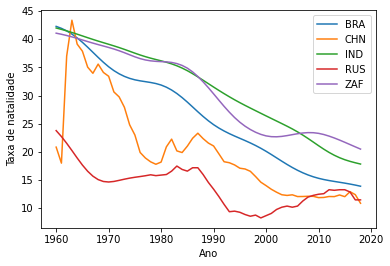

In [17]:
import seaborn

d = brics_melt.query("indicator_code=='SP.DYN.CBRT.IN'")
g = seaborn.lineplot(x="year", y="value", hue="country_code", data=d)
g.axes.set_xlabel("Ano")
g.axes.set_ylabel("Taxa de natalidade")
g.legend_.set_title(None)

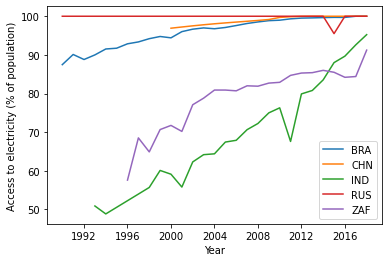

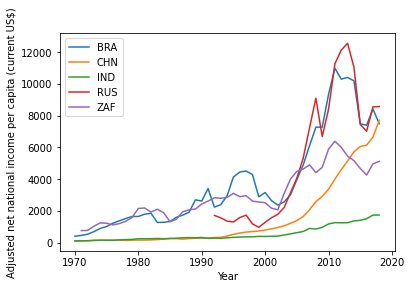

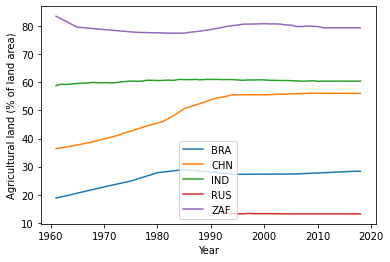

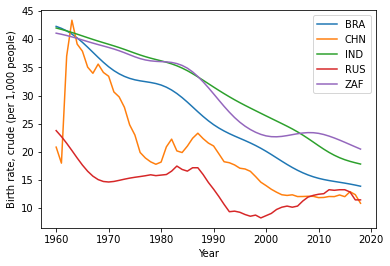

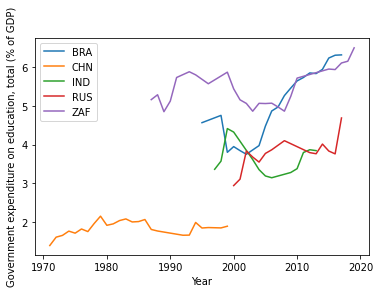

In [18]:
from matplotlib import pyplot
for indicator in indicators:
    fig = pyplot.figure()
    d = brics_melt.query(f"indicator_code=='{indicator}'")
    g = seaborn.lineplot(x="year", y="value", hue="country_code", data=d)
    g.axes.set_xlabel("Year")
    g.axes.set_ylabel(d["indicator_name"].iloc[0])
    g.legend_.set_title(None)

In [19]:
brics_pivot = brics_melt.pivot(index=["year", "country_code"], columns=["indicator_code"], values="value")
brics_pivot

indicator_code           AG.LND.AGRI.ZS  ...  SP.DYN.CBRT.IN
year       country_code                  ...                
1960-01-01 BRA                      NaN  ...          42.280
           CHN                      NaN  ...          20.860
           IND                      NaN  ...          41.995
           RUS                      NaN  ...          23.788
           ZAF                      NaN  ...          41.075
...                                 ...  ...             ...
2020-01-01 BRA                      NaN  ...             NaN
           CHN                      NaN  ...             NaN
           IND                      NaN  ...             NaN
           RUS                      NaN  ...             NaN
           ZAF                      NaN  ...             NaN

[305 rows x 5 columns]

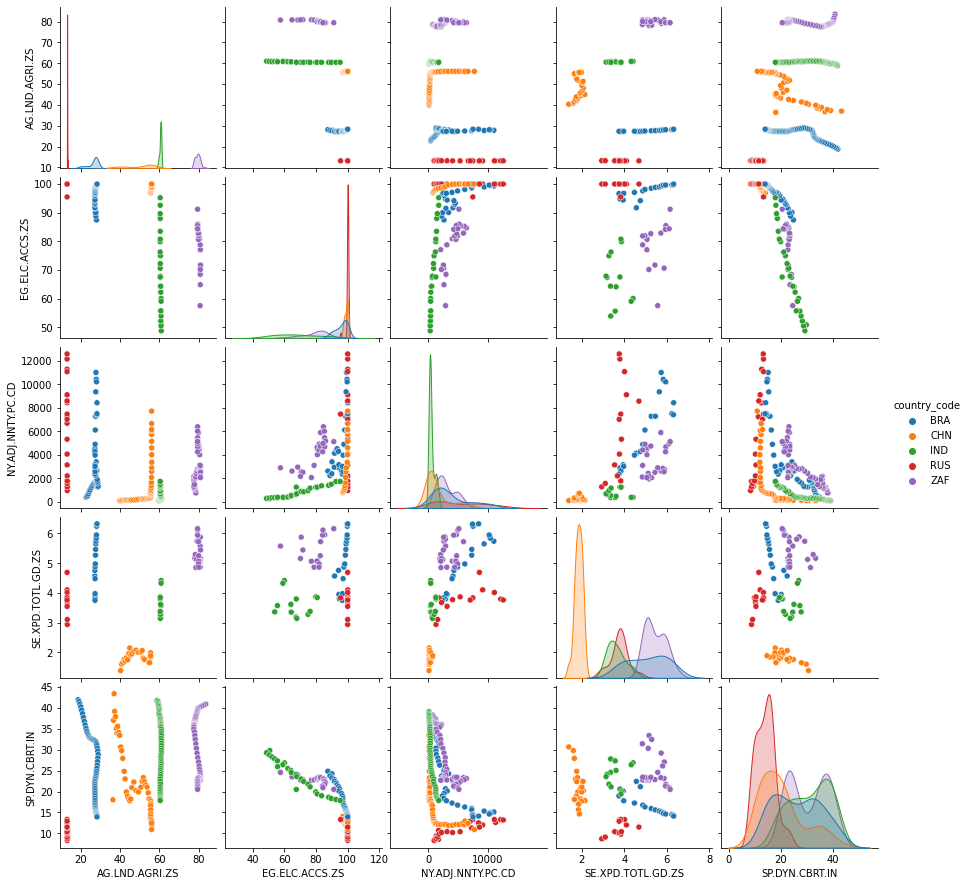

In [20]:
g = seaborn.pairplot(brics_pivot.reset_index(), hue="country_code")

In [21]:
brics_ts = brics_melt.query("indicator_code=='SE.XPD.TOTL.GD.ZS'").pivot(index="year", columns=["country_code"], values="value")

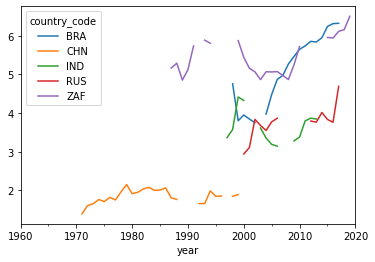

In [22]:
brics_ts.plot()

## Exercícios

In [23]:
import pandas
df = pandas.read_excel("WDIEXCEL.xlsx", sheet_name="Data")
df.columns = [col.replace(" ", "_").lower() for col in df.columns]

In [24]:
df = df\
    .melt(id_vars=['country_name', 'country_code', 'indicator_name', 'indicator_code'], var_name="year")\
    .dropna()
df

,country_name,country_code,indicator_name,indicator_code,year,value
48,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,134.772341
54,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,88.061110
55,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.591951
56,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,81.324186
88,Arab World,ARB,Aquaculture production (metric tons),ER.FSH.AQUA.MT,1960,4600.000000
...,...,...,...,...,...,...
23109037,Zimbabwe,ZWE,Secure Internet servers (per 1 million people),IT.NET.SECR.P6,2020,74.480253
23109066,Zimbabwe,ZWE,Source data assessment of statistical capacity...,IQ.SCI.SRCE,2020,60.000000
23109071,Zimbabwe,ZWE,Statistical Capacity score (Overall average),IQ.SCI.OVRL,2020,58.888900
23109198,Zimbabwe,ZWE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,2020,5.730000


### 1. Indicadores de população no Brasil

In [25]:
indicators = ["SP.POP.TOTL.FE.IN", "SP.POP.TOTL.MA.IN"]
pop = df\
    .query("country_code=='BRA' & indicator_code==@indicators")\
    .pivot(index="year", columns=["indicator_name"], values="value")

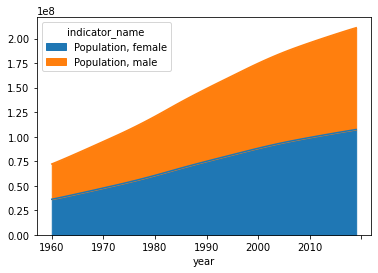

In [26]:
pop.plot.area(stacked=True)

In [28]:
pop["Population, total"] = pop["Population, female"] + pop["Population, male"]
pop.sample(5)

indicator_name,"Population, female","Population, male","Population, total"
year,,,
2011,100129351.0,97385183.0,197514534.0
1999,86926089.0,85392586.0,172318675.0
1974,52539488.0,52166710.0,104706198.0
1982,63492696.0,63005618.0,126498314.0
1996,82942144.0,81672544.0,164614688.0


In [29]:
pop_norm = pop.div(pop["Population, total"], axis=0)
pop_norm.head()

indicator_name,"Population, female","Population, male","Population, total"
year,,,
1960,0.502130,0.497870,1.0
1961,0.502011,0.497989,1.0
1962,0.501910,0.498090,1.0
1963,0.501828,0.498172,1.0
1964,0.501764,0.498236,1.0


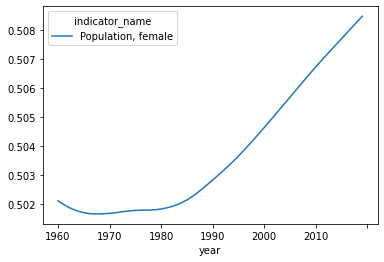

In [30]:
pop_norm.iloc[:, :1].plot()

In [31]:
bra = df\
    .query("country_code=='BRA'")\
    .melt(id_vars=['country_name', 'country_code', 'indicator_name', 'indicator_code'], var_name="year")\
    .dropna()
bra

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resultiing Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  """Entry point for launching an IPython kernel.


,country_name,country_code,indicator_name,indicator_code,year,value
0,Brazil,BRA,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,year,1960
1,Brazil,BRA,Age dependency ratio (% of working-age populat...,SP.POP.DPND,year,1960
2,Brazil,BRA,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,year,1960
3,Brazil,BRA,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,year,1960
4,Brazil,BRA,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,year,1960
...,...,...,...,...,...,...
80159,Brazil,BRA,Secure Internet servers (per 1 million people),IT.NET.SECR.P6,value,3087.19
80160,Brazil,BRA,Source data assessment of statistical capacity...,IQ.SCI.SRCE,value,80
80161,Brazil,BRA,Statistical Capacity score (Overall average),IQ.SCI.OVRL,value,81.1111
80162,Brazil,BRA,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,value,13.67
